# Cài đặt thư viện

In [ ]:
!pip install nltk
!pip install --upgrade gdown

  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [ ]:
import warnings
# Tắt tất cả các cảnh báo
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import re
import unicodedata
import joblib
import collections
import itertools
from math import log, sqrt
import time

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import bigrams

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import networkx as nx

# Đọc bộ dữ liệu, EDA và Tiền xử lý

In [ ]:
!gdown 1zEHdZsuew5zVo2KjXhQFHzF4EPPZFO6X

Downloading...
From: https://drive.google.com/uc?id=1zEHdZsuew5zVo2KjXhQFHzF4EPPZFO6X
To: /content/Personality-Youtube_data.xlsx
100% 25.0M/25.0M [00:00<00:00, 53.3MB/s]


In [ ]:
df = pd.read_excel('/content/Personality-Youtube_data.xlsx')
df.head(10)

,Topic,Channel,Subscribers,Channel URL,Video ID,Monetized,Comments Count,Comments Turned Off,Publish Date,Duration,View Count,Like Count,Title,Description
0,Animals,Amusing Antics,0,https://www.youtube.com/channel/UCdSa5ypKUP3tM...,ZXJ5GijeSVU,Not monetized,7,Comments turned on,2024-02-26T13:00:28Z,PT1H8M44S,93719,210,Best Funny Animals 2024 😻 Funniest Dogs and Ca...,Funniest Animals New Funny Cats and Dogs Video...
1,Animals,Nickelback - Topic,0,https://www.youtube.com/channel/UC1T4LYUer48Kh...,yAWo0DV03Ng,Not monetized,433,Comments turned on,2014-11-06T17:27:55Z,PT3M7S,26738388,240292,Animals,Provided to YouTube by Roadrunner Records Anim...
2,Animals,Nat Geo WILD,0,https://www.youtube.com/channel/UCDPk9MG2RexnO...,IA_qCkXwgFg,Not monetized,56,Comments turned on,2024-02-26T16:00:11Z,PT44M24S,41712,1047,Turf Wars: World&#39;s Angriest Animals (Full ...,Fins thrash and the fur flies as some of the w...
3,Animals,Starry Sky,0,https://www.youtube.com/channel/UC5YPvina0jntp...,hR_NDo6pn68,Not monetized,0,Comments turned on,2024-02-28T10:17:34Z,P0D,1081,396,"Ocean 4K - Sea Animals for Relaxation, Beautif...","Ocean 4K - Sea Animals for Relaxation, Beautif..."
4,Animals,Free Documentary - Nature,0,https://www.youtube.com/channel/UCQtW2oz8ec8pH...,u-dEnJpCGAQ,Not monetized,209,Comments turned on,2023-06-17T11:30:30Z,PT5H1M45S,1191645,5874,Wildlife - The Fascinating World of Wild Anima...,Wildlife - The Fascinating World of Wild Anima...
5,Animals,Sambucha,0,https://www.youtube.com/channel/UCWBWgCD4oAqT3...,4KMONkoh_yQ,Not monetized,2743,Comments turned on,2022-12-04T18:15:00Z,PT57S,6842105,606602,How Animals See the World,Join the Hat Gang! https://www.youtube.com/cha...
6,Animals,TyAmongAnimals,0,https://www.youtube.com/channel/UCu0tbUASI-lUZ...,tz7kclc4wms,Not monetized,2702,Comments turned on,2023-06-12T14:39:55Z,PT16S,8475490,485465,Top favorite animals! #animals #coolanimals #a...,NaN
7,Animals,Timeless Music,0,https://www.youtube.com/channel/UCRp--eWwsLI_u...,N4bFqW_eu2I,Not monetized,11712,Comments turned on,2021-03-01T17:38:18Z,PT4M21S,40260883,395708,The Animals - House Of The Rising Sun (Music V...,The Animals House Of The Rising Sun Music Vide...
8,Animals,Boo Kids Learning,0,https://www.youtube.com/channel/UCHO1U_zEehoZi...,ASsYdCoEUQ8,Not monetized,0,Comments turned on,2023-06-24T09:00:06Z,PT15M3S,41835667,108026,"Learn Colors With Animals Cow, Tiger, Lion, Go...","Learn Colors With Animals Cow, Tiger, Lion, Go..."
9,Animals,Scenic Scenes,0,https://www.youtube.com/channel/UCue2DK0ccHtBr...,oRDRfikj2z8,Not monetized,751,Comments turned on,2022-09-16T12:00:39Z,PT27M10S,11636831,36504,Baby Animals 4K - Amazing World Of Young Anima...,Sit back and relax while enjoying this scenic ...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139011 entries, 0 to 139010
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Topic                139011 non-null  object
 1   Channel              139010 non-null  object
 2   Subscribers          139011 non-null  int64 
 3   Channel URL          65529 non-null   object
 4   Video ID             139011 non-null  object
 5   Monetized            139011 non-null  object
 6   Comments Count       139011 non-null  int64 
 7   Comments Turned Off  139011 non-null  object
 8   Publish Date         139011 non-null  object
 9   Duration             139011 non-null  object
 10  View Count           139011 non-null  int64 
 11  Like Count           139011 non-null  int64 
 12  Title                139010 non-null  object
 13  Description          122537 non-null  object
dtypes: int64(4), object(10)
memory usage: 14.8+ MB


In [ ]:
topic_counts = df['Topic'].value_counts()
print(topic_counts)

News & Politics          16015
Gaming                   14732
Travel & Events          13129
NonProfit & Activism     12014
Education                11785
Science & Technology     10514
History & Documentary    10346
Film & Animation         10190
Sports                   10174
Animals                  10157
Food                     10042
Music                     9913
Name: Topic, dtype: int64


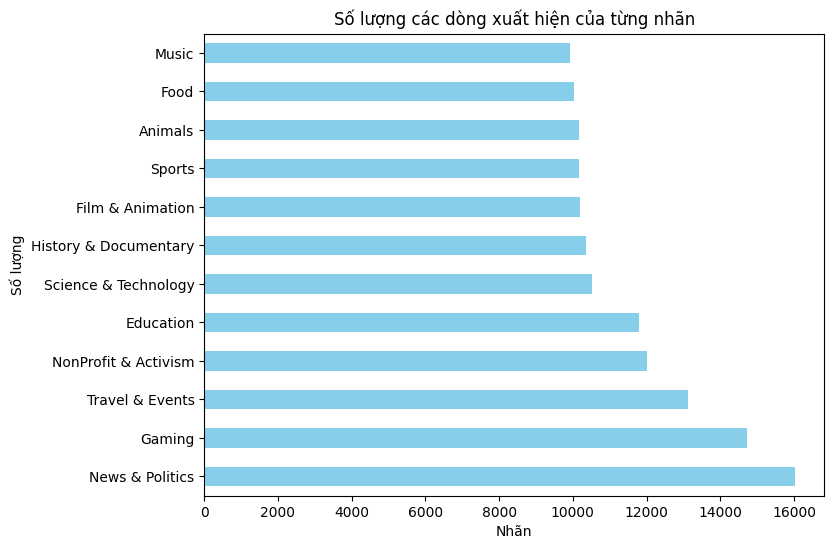

In [ ]:
plt.figure(figsize=(8, 6))
topic_counts.plot(kind='barh', color='skyblue')

# Thêm tiêu đề và nhãn cho trục x, y
plt.title('Số lượng các dòng xuất hiện của từng nhãn')
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')

# Hiển thị biểu đồ
plt.show()

In [ ]:
df['Description'].fillna('', inplace=True)
df['Description'].isnull().sum()

0

In [ ]:
topic_counts.mean()

11584.25

In [ ]:
df['Title'] = df['Title'].astype(str)
df['Description'] = df['Description'].astype(str)

In [ ]:
# Merge the two columns into a new column named 'Title_Description'
df['Title_Description'] = df['Title'] + ' ' + df['Description']

# Drop the original 'Title' and 'Description' columns
df.drop(columns=['Description'], inplace=True)

# Display the first few rows of the DataFrame
df.head()

,Topic,Channel,Subscribers,Channel URL,Video ID,Monetized,Comments Count,Comments Turned Off,Publish Date,Duration,View Count,Like Count,Title,Title_Description
0,Animals,Amusing Antics,0,https://www.youtube.com/channel/UCdSa5ypKUP3tM...,ZXJ5GijeSVU,Not monetized,7,Comments turned on,2024-02-26T13:00:28Z,PT1H8M44S,93719,210,Best Funny Animals 2024 😻 Funniest Dogs and Ca...,Best Funny Animals 2024 😻 Funniest Dogs and Ca...
1,Animals,Nickelback - Topic,0,https://www.youtube.com/channel/UC1T4LYUer48Kh...,yAWo0DV03Ng,Not monetized,433,Comments turned on,2014-11-06T17:27:55Z,PT3M7S,26738388,240292,Animals,Animals Provided to YouTube by Roadrunner Reco...
2,Animals,Nat Geo WILD,0,https://www.youtube.com/channel/UCDPk9MG2RexnO...,IA_qCkXwgFg,Not monetized,56,Comments turned on,2024-02-26T16:00:11Z,PT44M24S,41712,1047,Turf Wars: World&#39;s Angriest Animals (Full ...,Turf Wars: World&#39;s Angriest Animals (Full ...
3,Animals,Starry Sky,0,https://www.youtube.com/channel/UC5YPvina0jntp...,hR_NDo6pn68,Not monetized,0,Comments turned on,2024-02-28T10:17:34Z,P0D,1081,396,"Ocean 4K - Sea Animals for Relaxation, Beautif...","Ocean 4K - Sea Animals for Relaxation, Beautif..."
4,Animals,Free Documentary - Nature,0,https://www.youtube.com/channel/UCQtW2oz8ec8pH...,u-dEnJpCGAQ,Not monetized,209,Comments turned on,2023-06-17T11:30:30Z,PT5H1M45S,1191645,5874,Wildlife - The Fascinating World of Wild Anima...,Wildlife - The Fascinating World of Wild Anima...


In [ ]:
# Tạo dataFrame cho bộ dữ liệu
data = pd.DataFrame(df, columns =['Title_Description', 'View Count', 'Like Count', 'Topic', 'Title'])
data

,Title_Description,View Count,Like Count,Topic,Title
0,Best Funny Animals 2024 😻 Funniest Dogs and Ca...,93719,210,Animals,Best Funny Animals 2024 😻 Funniest Dogs and Ca...
1,Animals Provided to YouTube by Roadrunner Reco...,26738388,240292,Animals,Animals
2,Turf Wars: World&#39;s Angriest Animals (Full ...,41712,1047,Animals,Turf Wars: World&#39;s Angriest Animals (Full ...
3,"Ocean 4K - Sea Animals for Relaxation, Beautif...",1081,396,Animals,"Ocean 4K - Sea Animals for Relaxation, Beautif..."
4,Wildlife - The Fascinating World of Wild Anima...,1191645,5874,Animals,Wildlife - The Fascinating World of Wild Anima...
...,...,...,...,...,...
139006,Top 5 Qatar Events (8-10 June 2023) It's final...,630,18,Travel & Events,Top 5 Qatar Events (8-10 June 2023)
139007,Top 5 Qatar Events (9-11 March 2023) It's fina...,494,16,Travel & Events,Top 5 Qatar Events (9-11 March 2023)
139008,TOP EVENTS/WEDDING PLANNER IN UGANDA A modern ...,341,8,Travel & Events,TOP EVENTS/WEDDING PLANNER IN UGANDA
139009,Why Are Fortnite Pros Carrying the Lock on Pis...,3222875,185120,Travel & Events,Why Are Fortnite Pros Carrying the Lock on Pis...


## Trực quan hóa các từ có trong tập dữ liệu

In [ ]:
def word_count(sentence):
    return len(sentence.split())

data['word count'] = data['Title_Description'].apply(word_count)
print(data['word count'].describe(),'\n')

count    139011.000000
mean         26.054377
std           9.456675
min           1.000000
25%          21.000000
50%          28.000000
75%          33.000000
max          62.000000
Name: word count, dtype: float64 



In [ ]:
import collections
all_words = []
for line in list(data['Title_Description']): #Chia chuỗi thành các đơn từ
    words = line.split()
    for word in words:
        all_words.append(word.lower())
collections.Counter(all_words).most_common(10)#In ra 10 từ phổ biến nhất

[('...', 100655),
 ('the', 97748),
 ('|', 73194),
 ('to', 56699),
 ('of', 54816),
 ('and', 49294),
 ('in', 48569),
 ('-', 44336),
 ('a', 40957),
 ('for', 34419)]

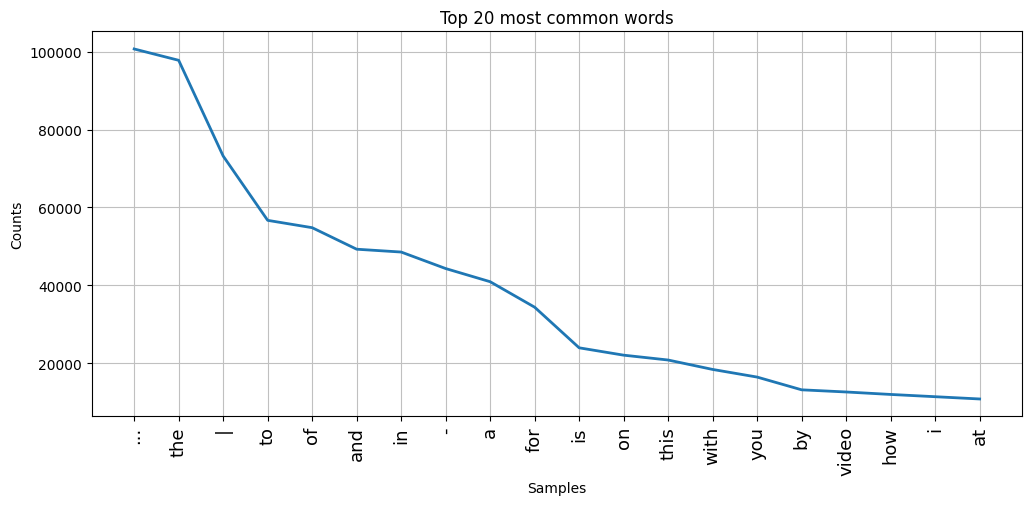

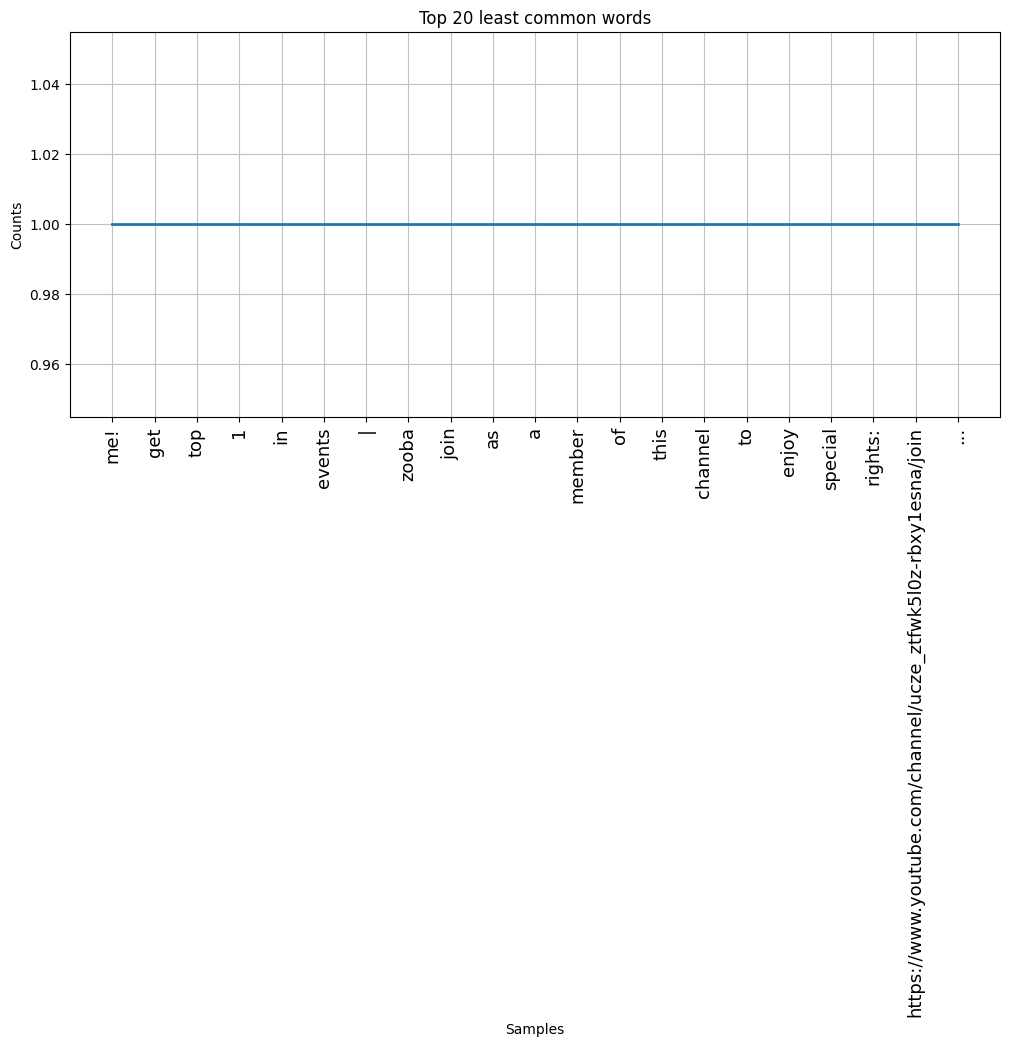

Text(0.5, 0, 'Word rank')

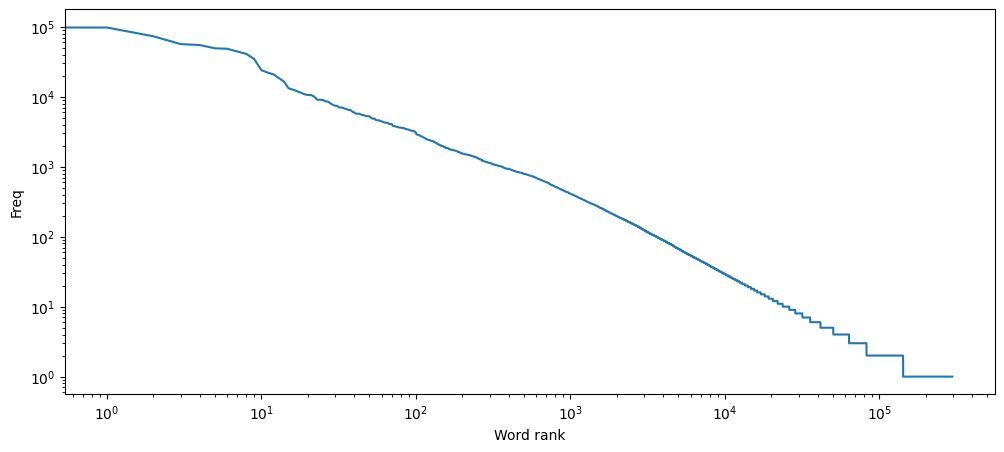

In [ ]:
# plot word frequency distribution of most common words
plt.figure(figsize=(12,5))
plt.title('Top 20 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(20, cumulative=False)

# plot word frequency distribution of least common words
plt.figure(figsize=(12,5))
plt.title('Top 20 least common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words[-21:])
fd.plot(cumulative=False)

# log-log plot
word_counts = sorted(collections.Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel('Freq')
plt.xlabel('Word rank')

## Tiền xử lý dữ liệu

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
# Hàm xác định chữ cái tiếng Anh hợp lệ
def is_english(word):
    for char in word:
        if not ('a' <= char.lower() <= 'z'):
            return False
    return True

# Hàm loại bỏ các từ không phải tiếng Anh
def remove_non_english(text):
    words = text.split()
    output = []

    current_word = ''
    for word in words:
        if is_english(word):
            current_word += word + ' '
        elif current_word:
            output.append(current_word.strip())
            current_word = ''

    if current_word:
        output.append(current_word.strip())

    return ' '.join(output)

In [ ]:
data['Title_Description'] = data['Title_Description'].apply(remove_non_english)

In [ ]:
import string
def processTitle(title):
    # Remove HTML special entities (e.g. &amp;)
    title = re.sub(r'\&\w*;', '', title)
    #Convert @username to AT_USER
    title = re.sub('@[^\s]+','',title)
    # Remove tickers
    title = re.sub(r'\$\w*', '', title)
    # To lowercase
    title = title.lower()
    # Remove hyperlinks
    title = re.sub(r'https?:\/\/.*\/\w*', '', title)
    # Remove hashtags
    title = re.sub(r'#\w*', '', title)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    title = re.sub(r'['+string.punctuation+']+', ' ', title)
    # Remove words with 2 or fewer letters
    title = re.sub(r'\b\w{1,2}\b', '', title)
    # Remove whitespace (including new line characters)
    title = re.sub(r'\s\s+', ' ', title)
    # Remove single space remaining at the front of the title.
    title = title.lstrip(' ')
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    title = ''.join(c for c in title if c <= '\uFFFF')
    return title

In [ ]:
# clean dataframe's text column
data['text'] = data['Title_Description'].apply(processTitle)
# preview some cleaned tweets
data['text'].head()

0    best funny animals funniest dogs and cats funn...
1    animals provided youtube roadrunner records an...
2    turf angriest animals animal fight night fins ...
3    ocean sea animals for beautiful coral reef fis...
4    wildlife the fascinating world wild animals fu...
Name: text, dtype: object

## Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
w_tokenizer=nltk.tokenize.WhitespaceTokenizer()
lemmatizer=WordNetLemmatizer() # Xóa bỏ các hậu tố
def lemmatize_text(text):
    return[lemmatizer.lemmatize(w)for w in w_tokenizer.tokenize(text)]

In [ ]:
data['lemm_title']= data.text.apply(lemmatize_text)
data['temp_title']=[' '.join(map(str, l))for l in data['lemm_title']]

data.head()

,Title_Description,View Count,Like Count,Topic,Title,word count,text,lemm_title,temp_title
0,Best Funny Animals Funniest Dogs and Cats Funn...,93719,210,Animals,Best Funny Animals 2024 😻 Funniest Dogs and Ca...,26,best funny animals funniest dogs and cats funn...,"[best, funny, animal, funniest, dog, and, cat,...",best funny animal funniest dog and cat funnies...
1,Animals Provided to YouTube by Roadrunner Reco...,26738388,240292,Animals,Animals,22,animals provided youtube roadrunner records an...,"[animal, provided, youtube, roadrunner, record...",animal provided youtube roadrunner record anim...
2,Turf Angriest Animals Animal Fight Night Fins ...,41712,1047,Animals,Turf Wars: World&#39;s Angriest Animals (Full ...,36,turf angriest animals animal fight night fins ...,"[turf, angriest, animal, animal, fight, night,...",turf angriest animal animal fight night fin th...
3,Ocean Sea Animals for Beautiful Coral Reef Fis...,1081,396,Animals,"Ocean 4K - Sea Animals for Relaxation, Beautif...",41,ocean sea animals for beautiful coral reef fis...,"[ocean, sea, animal, for, beautiful, coral, re...",ocean sea animal for beautiful coral reef fish...
4,Wildlife The Fascinating World of Wild Animals...,1191645,5874,Animals,Wildlife - The Fascinating World of Wild Anima...,34,wildlife the fascinating world wild animals fu...,"[wildlife, the, fascinating, world, wild, anim...",wildlife the fascinating world wild animal ful...


In [ ]:
stopwords_english = stopwords.words('english')
print (stopwords_english)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
from textblob import Word
def text_process(raw_text):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in list(raw_text) if char not in string.punctuation]
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    # remove all stopwords
    return [word for word in nopunc.lower().split() if word.lower() not in stopwords_english]

def remove_words(word_list):
    remove = ['i','me','my','flight','hour','minute','wa','airline','bag','plane','cancelled','myself','we','our','ours','ourselves','you',"you're","you've","you'll","you'd",'your','yours','yourself','yourselves','he','him','his','himself','she',"she's",'her','hers','herself','it',"it's",'its','itself','they','them','their','theirs','themselves','what','which','who','whom','this','that',"that'll",'these','those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against','between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each','few','more','most','other','some','such','...','“','”','’','...']
    return [w for w in word_list if w not in remove]

In [ ]:
# tokenize message column and create a column for tokens
data['temp']=data['temp_title'].apply(text_process)
data['tokens']=data['temp'].apply(remove_words)

data[['text','temp_title','temp','tokens']]

,text,temp_title,temp,tokens
0,best funny animals funniest dogs and cats funn...,best funny animal funniest dog and cat funnies...,"[best, funny, animal, funniest, dog, cat, funn...","[best, funny, animal, funniest, dog, cat, funn..."
1,animals provided youtube roadrunner records an...,animal provided youtube roadrunner record anim...,"[animal, provided, youtube, roadrunner, record...","[animal, provided, youtube, roadrunner, record..."
2,turf angriest animals animal fight night fins ...,turf angriest animal animal fight night fin th...,"[turf, angriest, animal, animal, fight, night,...","[turf, angriest, animal, animal, fight, night,..."
3,ocean sea animals for beautiful coral reef fis...,ocean sea animal for beautiful coral reef fish...,"[ocean, sea, animal, beautiful, coral, reef, f...","[ocean, sea, animal, beautiful, coral, reef, f..."
4,wildlife the fascinating world wild animals fu...,wildlife the fascinating world wild animal ful...,"[wildlife, fascinating, world, wild, animal, f...","[wildlife, fascinating, world, wild, animal, f..."
...,...,...,...,...
139005,top qatar events april finally the got lineup ...,top qatar event april finally the got lineup e...,"[top, qatar, event, april, finally, got, lineu...","[top, qatar, event, april, finally, got, lineu..."
139006,top qatar events june finally the got lineup e...,top qatar event june finally the got lineup ex...,"[top, qatar, event, june, finally, got, lineup...","[top, qatar, event, june, finally, got, lineup..."
139007,top qatar events march finally the got lineup ...,top qatar event march finally the got lineup e...,"[top, qatar, event, march, finally, got, lineu...","[top, qatar, event, march, finally, got, lineu..."
139008,top planner uganda modern black and gold classy,top planner uganda modern black and gold classy,"[top, planner, uganda, modern, black, gold, cl...","[top, planner, uganda, modern, black, gold, cl..."


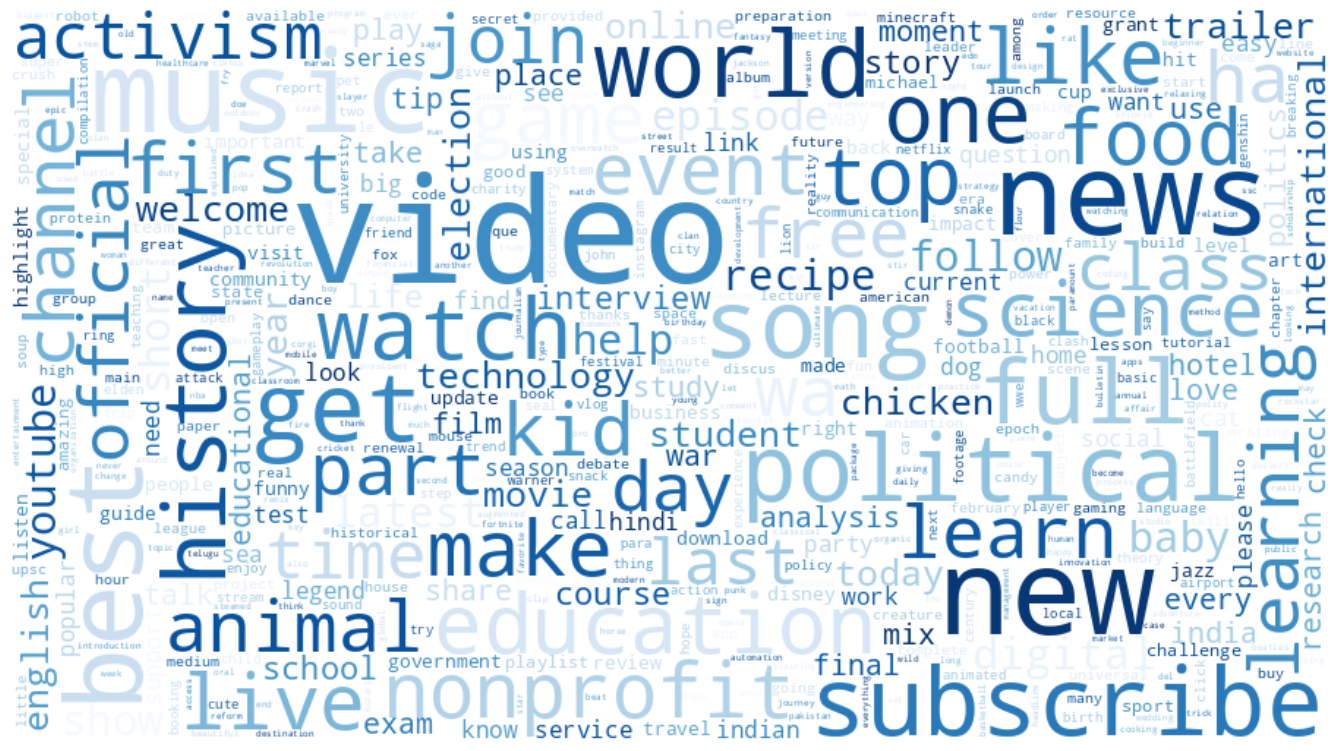

In [ ]:
# from PIL import Image
# from io import BytesIO
# import requests
# response = requests.get('https://raw.githubusercontent.com/R-CoderDotCom/samples/main/wordcloud-mask.jpg')
# mask = np.array(Image.open(BytesIO(response.content)))

# split sentences to get individual words
all_words = []
for line in data['temp']:
    all_words.extend(line)

# create a word frequency dictionary
wordfreq = collections.Counter(all_words) # draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      background_color='White',
                      # mask = mask,
                      normalize_plurals=True).generate_from_frequencies(wordfreq)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
all_words = []
for line in list(data['tokens']):
    for word in line:
        all_words.append(word.lower())

collections.Counter(all_words).most_common(10)

[('video', 13375),
 ('new', 8568),
 ('news', 7993),
 ('music', 7817),
 ('best', 6619),
 ('get', 5329),
 ('song', 5301),
 ('subscribe', 5264),
 ('world', 4940),
 ('political', 4870)]

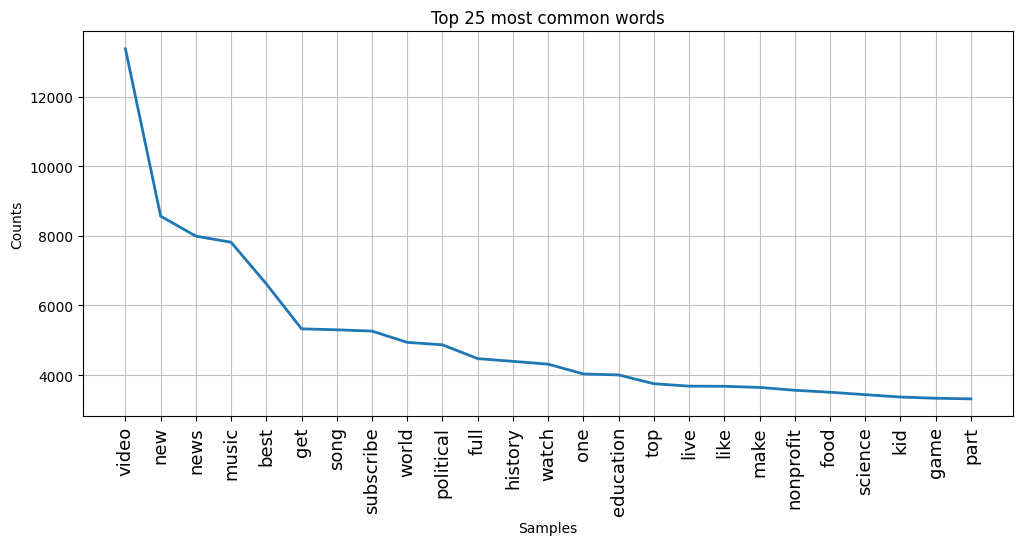

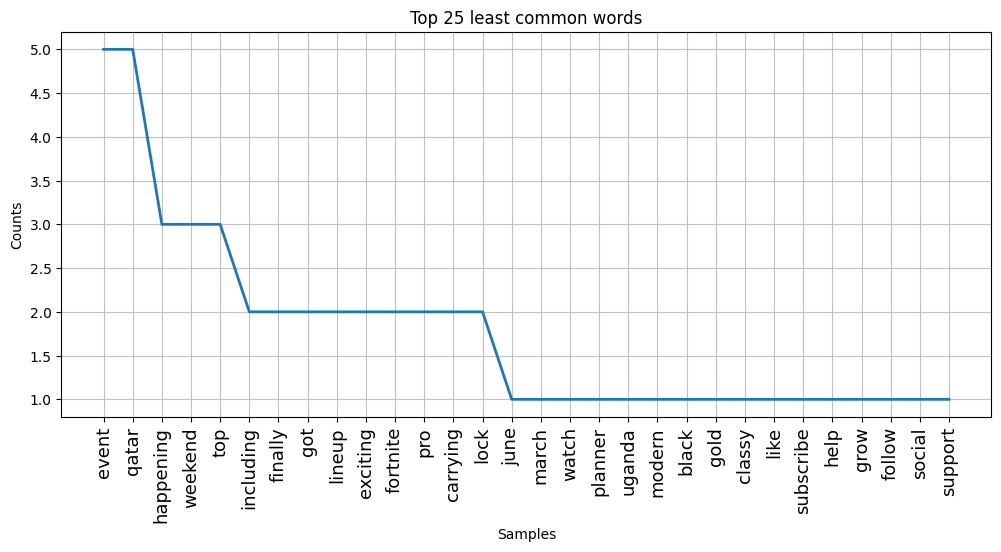

Text(0.5, 1.0, 'log-log plot of words frequency')

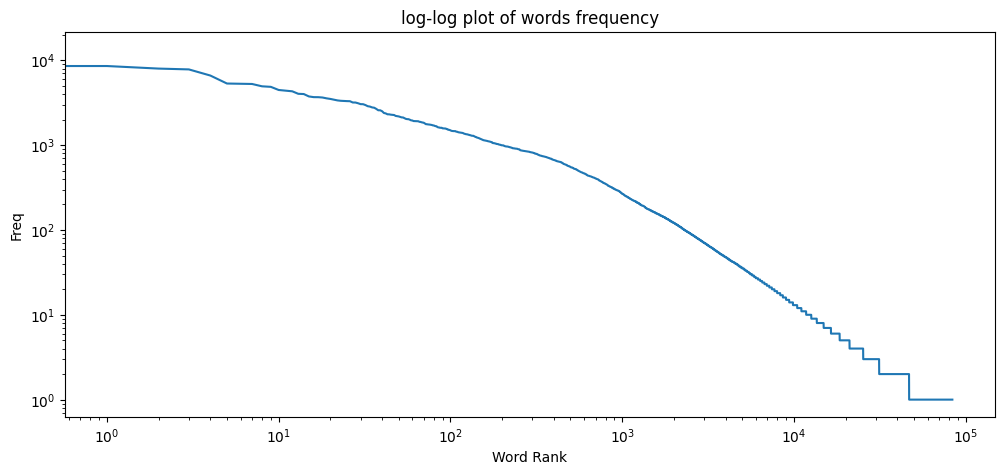

In [ ]:
#plot word frequency distribution of most common words
plt.figure(figsize=(12,5))
plt.title('Top 25 most common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

# plot word frequency distribution of least common words
plt.figure(figsize=(12,5))
plt.title('Top 25 least common words')
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words[-53:])
fd.plot(cumulative=False)

# log-log plot
word_counts = sorted(collections.Counter(all_words).values(), reverse=True)
plt.figure(figsize=(12,5))
plt.loglog(word_counts, linestyle='-', linewidth=1.5)
plt.ylabel('Freq')
plt.xlabel('Word Rank')
plt.title('log-log plot of words frequency')

In [ ]:
data.tail()

,Title_Description,View Count,Like Count,Topic,Title,word count,text,lemm_title,temp_title,temp,tokens
139005,Top Qatar Events April finally the got a lineu...,948,22,Travel & Events,Top 5 Qatar Events (6-8 April 2023),28,top qatar events april finally the got lineup ...,"[top, qatar, event, april, finally, the, got, ...",top qatar event april finally the got lineup e...,"[top, qatar, event, april, finally, got, lineu...","[top, qatar, event, april, finally, got, lineu..."
139006,Top Qatar Events June finally the got a lineup...,630,18,Travel & Events,Top 5 Qatar Events (8-10 June 2023),28,top qatar events june finally the got lineup e...,"[top, qatar, event, june, finally, the, got, l...",top qatar event june finally the got lineup ex...,"[top, qatar, event, june, finally, got, lineup...","[top, qatar, event, june, finally, got, lineup..."
139007,Top Qatar Events March finally the got a lineu...,494,16,Travel & Events,Top 5 Qatar Events (9-11 March 2023),30,top qatar events march finally the got lineup ...,"[top, qatar, event, march, finally, the, got, ...",top qatar event march finally the got lineup e...,"[top, qatar, event, march, finally, got, lineu...","[top, qatar, event, march, finally, got, lineu..."
139008,TOP PLANNER IN UGANDA A modern black and gold ...,341,8,Travel & Events,TOP EVENTS/WEDDING PLANNER IN UGANDA,12,top planner uganda modern black and gold classy,"[top, planner, uganda, modern, black, and, gol...",top planner uganda modern black and gold classy,"[top, planner, uganda, modern, black, gold, cl...","[top, planner, uganda, modern, black, gold, cl..."
139009,Why Are Fortnite Pros Carrying the Lock on Why...,3222875,185120,Travel & Events,Why Are Fortnite Pros Carrying the Lock on Pis...,32,why are fortnite pros carrying the lock why ar...,"[why, are, fortnite, pro, carrying, the, lock,...",why are fortnite pro carrying the lock why are...,"[fortnite, pro, carrying, lock, fortnite, pro,...","[fortnite, pro, carrying, lock, fortnite, pro,..."


In [ ]:
data['clean_title'] = [' '.join(map(str, l)) for l in data['tokens']]
data=data.drop(columns=['lemm_title','text','temp','temp_title', 'word count'])
data.head()

,Title_Description,View Count,Like Count,Topic,Title,tokens,clean_title
0,Best Funny Animals Funniest Dogs and Cats Funn...,93719,210,Animals,Best Funny Animals 2024 😻 Funniest Dogs and Ca...,"[best, funny, animal, funniest, dog, cat, funn...",best funny animal funniest dog cat funniest an...
1,Animals Provided to YouTube by Roadrunner Reco...,26738388,240292,Animals,Animals,"[animal, provided, youtube, roadrunner, record...",animal provided youtube roadrunner record anim...
2,Turf Angriest Animals Animal Fight Night Fins ...,41712,1047,Animals,Turf Wars: World&#39;s Angriest Animals (Full ...,"[turf, angriest, animal, animal, fight, night,...",turf angriest animal animal fight night fin th...
3,Ocean Sea Animals for Beautiful Coral Reef Fis...,1081,396,Animals,"Ocean 4K - Sea Animals for Relaxation, Beautif...","[ocean, sea, animal, beautiful, coral, reef, f...",ocean sea animal beautiful coral reef fish aqu...
4,Wildlife The Fascinating World of Wild Animals...,1191645,5874,Animals,Wildlife - The Fascinating World of Wild Anima...,"[wildlife, fascinating, world, wild, animal, f...",wildlife fascinating world wild animal full se...


## N-gram

In [ ]:
terms_bigram = [list(bigrams(title)) for title in data.tokens]
terms_bigram[0]

[('best', 'funny'),
 ('funny', 'animal'),
 ('animal', 'funniest'),
 ('funniest', 'dog'),
 ('dog', 'cat'),
 ('cat', 'funniest'),
 ('funniest', 'animal'),
 ('animal', 'new'),
 ('new', 'funny'),
 ('funny', 'cat'),
 ('cat', 'dog'),
 ('dog', 'video'),
 ('video', 'link'),
 ('link', 'welcome')]

In [ ]:
# Flatten list of bigrams in clean tweets
# In tất cả các giá trị có trong terms_bigram có thể lặp lại lần lượt
bigrams = list(itertools.chain(*terms_bigram))
# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)
bigram_counts.most_common(25)

[(('political', 'science'), 1101),
 (('world', 'cup'), 961),
 (('music', 'video'), 915),
 (('provided', 'youtube'), 899),
 (('candy', 'crush'), 868),
 (('last', 'epoch'), 849),
 (('digital', 'education'), 731),
 (('augmented', 'reality'), 721),
 (('elden', 'ring'), 721),
 (('crush', 'saga'), 701),
 (('michael', 'jackson'), 671),
 (('genshin', 'impact'), 665),
 (('fast', 'food'), 656),
 (('call', 'duty'), 649),
 (('century', 'fox'), 645),
 (('sea', 'lion'), 619),
 (('official', 'trailer'), 612),
 (('oral', 'history'), 608),
 (('current', 'affair'), 601),
 (('science', 'technology'), 592),
 (('hotel', 'booking'), 586),
 (('community', 'service'), 582),
 (('homework', 'help'), 579),
 (('league', 'legend'), 572),
 (('classical', 'music'), 570)]

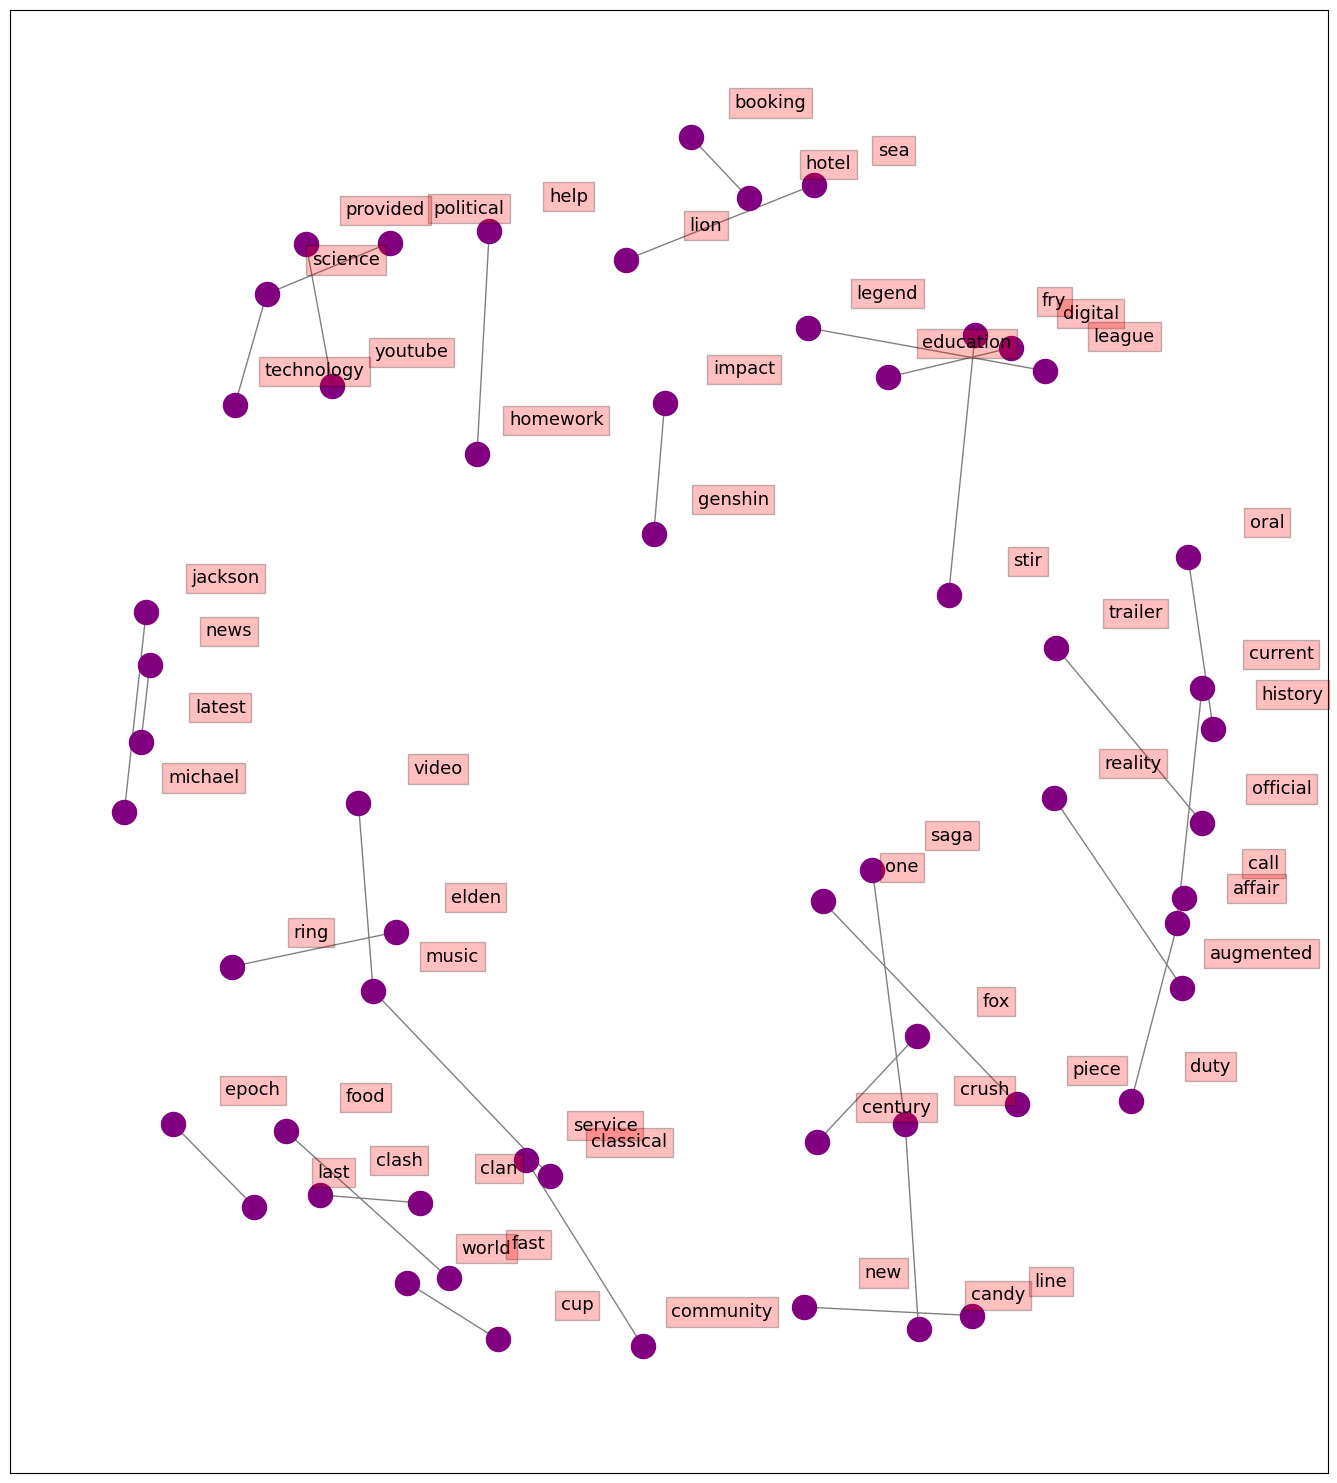

In [ ]:
bigram_df = pd.DataFrame(bigram_counts.most_common(30),columns=['bigram', 'count'])

# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')

# Create network plot # Tạo một biểu đồ trống
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
fig, ax = plt.subplots(figsize=(17, 19))
pos = nx.spring_layout(G, k=10) # tăng khoảng cách giữa các node là 10

# Plot networks
nx.draw_networkx(G, pos,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
plt.show()

# Chạy mô hình

## Cài đặt thư viện và import dữ liệu huấn luyện

In [ ]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing   import LabelEncoder

#Model
import gensim
from gensim.models import Word2Vec
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from joblib import dump
from tensorflow.keras.models import load_model

#Evaluate
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
from keras.callbacks import EarlyStopping

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [ ]:
sentences = data['clean_title']
labels = data['Topic']
tokens = data['tokens']
re_title = data['Title']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119366 entries, 0 to 139009
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Title_Description  119366 non-null  object
 1   View Count         119366 non-null  int64 
 2   Like Count         119366 non-null  int64 
 3   Topic              119366 non-null  object
 4   Title              119366 non-null  object
 5   tokens             119366 non-null  object
 6   clean_title        119366 non-null  object
dtypes: int64(2), object(5)
memory usage: 7.3+ MB


In [ ]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

In [ ]:
label_mapping = {encoded_label: labels for encoded_label, labels in zip(encoded_labels, labels)}

# In ra ánh xạ giữa các nhãn đã mã hóa và nhãn cũ
print('Ánh xạ giữa nhãn đã mã hóa và nhãn cũ:')
for encoded_label, label in label_mapping.items():
    print(f"{encoded_label}: {label}")

Ánh xạ giữa nhãn đã mã hóa và nhãn cũ:
0: Animals
1: Education
2: Film & Animation
3: Food
4: Gaming
5: History & Documentary
6: Music
7: News & Politics
8: NonProfit & Activism
9: Science & Technology
10: Sports
11: Travel & Events


## Naive Bayes

### Vectorize và chia tập dữ liệu

In [ ]:
# Initialize CountVectorizer to convert text data into numerical features
vectorizer = CountVectorizer()

# Convert text data into numerical features
X_NB = vectorizer.fit_transform(sentences)

In [ ]:
# Split the data into training and testing sets
X_train_NB, X_test_NB, y_train_NB, y_test_NB = train_test_split(X_NB, encoded_labels, test_size=0.2, random_state=42)

### Huấn luyện mô hình

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
start_time_nb = time.time()

# Initialize and train Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_NB, y_train_NB)

end_time_nb = time.time()
elapsed_time_nb = end_time_nb - start_time_nb

In [ ]:
# Lưu model thành file pickle
joblib.dump(classifier, 'naive_bayes_model.pkl')

['naive_bayes_model.pkl']

In [ ]:
# Predictions
y_pred_NB = classifier.predict(X_test_NB)

# Evaluation
accuracy_NB = accuracy_score(y_test_NB, y_pred_NB)
recall_NB = recall_score(y_test_NB, y_pred_NB, average='macro')
precision_NB = precision_score(y_test_NB, y_pred_NB, average='macro')
f1_NB = f1_score(y_test_NB, y_pred_NB, average='macro')

# Classification report
print('Classification Report:')
print(classification_report(y_test_NB, y_pred_NB))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1871
           1       0.82      0.84      0.83      2123
           2       0.84      0.85      0.84      1832
           3       0.88      0.84      0.86      1875
           4       0.83      0.89      0.86      1840
           5       0.86      0.75      0.80      1823
           6       0.82      0.85      0.83      1736
           7       0.74      0.89      0.81      2805
           8       0.80      0.82      0.81      2081
           9       0.84      0.74      0.78      1850
          10       0.88      0.80      0.84      1740
          11       0.82      0.75      0.78      2298

    accuracy                           0.82     23874
   macro avg       0.83      0.82      0.82     23874
weighted avg       0.82      0.82      0.82     23874



In [ ]:
print(f'Accuracy: {accuracy_NB}')
print(f'Recall: {recall_NB}')
print(f'Precision: {precision_NB}')
print(f'F1 Score: {f1_NB}')

Accuracy: 0.8211024545530703
Recall: 0.8191062396639567
Precision: 0.8283681958140101
F1 Score: 0.8221207412593672


## Logistic Regression


### Chia tập dữ liệu

In [ ]:
# Dữ liệu huấn luyện và nhãn tương ứng
X_LR = sentences # Dữ liệu văn bản huấn luyện
y_LR = labels  # Nhãn tương ứng

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X_LR, y_LR, test_size=0.2, random_state=42)

### Huấn luyện mô hình

In [ ]:
#Xây dựng pipeline cho mô hình
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Chuyển đổi văn bản thành vectơ TF-IDF
    ('clf', LogisticRegression()),  # Sử dụng mô hình Logistic Regression
])
start_time_lr = time.time()

# Huấn luyện mô hình
pipeline.fit(X_train_LR, y_train_LR)

end_time_lr = time.time()
elapsed_time_lr = end_time_lr - start_time_lr

In [ ]:
# Lưu model thành file pickle
joblib.dump(pipeline, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [ ]:
# Dự đoán nhãn cho tập kiểm tra
predicted_labels_LR = pipeline.predict(X_test_LR)

# Đánh giá hiệu suất của mô hình
accuracy_LR = accuracy_score(y_test_LR, predicted_labels_LR)
recall_LR = recall_score(y_test_LR, predicted_labels_LR, average='macro')
precision_LR = precision_score(y_test_LR, predicted_labels_LR, average='macro')
f1_LR = f1_score(y_test_LR, predicted_labels_LR, average='macro')
report_LR = classification_report(y_test_LR, predicted_labels_LR)
print('Classification Report:\n', report_LR)

Classification Report:
                        precision    recall  f1-score   support

              Animals       0.91      0.85      0.88      1871
            Education       0.89      0.86      0.88      2123
     Film & Animation       0.88      0.87      0.88      1832
                 Food       0.93      0.89      0.91      1875
               Gaming       0.91      0.89      0.90      1840
History & Documentary       0.88      0.83      0.86      1823
                Music       0.85      0.88      0.87      1736
      News & Politics       0.89      0.92      0.90      2805
 NonProfit & Activism       0.88      0.83      0.85      2081
 Science & Technology       0.86      0.84      0.85      1850
               Sports       0.70      0.87      0.78      1740
      Travel & Events       0.84      0.84      0.84      2298

             accuracy                           0.87     23874
            macro avg       0.87      0.87      0.87     23874
         weighted avg       0

In [ ]:
print(f'Các chỉ số đánh giá cho Linear Regression:')
print(f'Accuracy: {accuracy_LR}')
print(f'Recall: {recall_LR}')
print(f'Precision: {precision_LR}')
print(f'F1-score: {f1_LR}')

Các chỉ số đánh giá cho Linear Regression:
Accuracy: 0.866423724553908
Recall: 0.8652857077034816
Precision: 0.8682743563265238
F1-score: 0.8657278698897165


## LSTM

In [ ]:
data_LSTM = pd.DataFrame({
    'clean_title': sentences,
    'Topic': encoded_labels,
    'tokens': tokens
})

In [ ]:
# Chia tập train (70%) và tập còn lại (30%)
train, temp_data = train_test_split(data_LSTM, test_size=0.2, random_state=42)

# Chia tập còn lại thành tập validation (50%) và tập test (50%)
val, test = train_test_split(temp_data, test_size=0.5, random_state=42)

# In kích thước của các tập dữ liệu
print(f'Kích thước tập train: {len(train)}')
print(f'Kích thước tập validation: {len(val)}')
print(f'Kích thước tập test: {len(test)}')

Kích thước tập train: 95492
Kích thước tập validation: 11937
Kích thước tập test: 11937


In [ ]:
train_x = train['clean_title'].tolist()
val_x = val['clean_title'].tolist()
test_x = test['clean_title'].tolist()

word_train = [token for token in train.tokens]
word_valid=[token for token in val.tokens]
word_test = [token for token in test.tokens]

In [ ]:
def check_input(data):
    if isinstance(data, list):
        for item in data:
            if not isinstance(item, str):
                return False
        return True
    else:
        return False

print(check_input(word_train))  # Trả về True nếu data là danh sách các từ

False


### W2V

In [ ]:
# Cài đặt các chỉ số
min_count=2
window=5
vector_size=100
alpha=1e-3
min_alpha=1e-4
negative=5

In [ ]:
# Tạo mô hình Word2Vec
w2v_model = Word2Vec(min_count=min_count, window=window, vector_size=vector_size, sg=0)
# Xây dựng từ điển cho tập dữ liệu
w2v_model.build_vocab(word_train)

In [ ]:
#Huấn luyện mô hình
w2v_model.train(word_train, total_examples=w2v_model.corpus_count, epochs=100, report_delay=1,compute_loss=True)

(113365119, 118745700)

### Xây dựng mô hình và huấn luyện

In [ ]:
# # Kích thước của từ điển
# vocab_size = len(w2v_model.wv.key_to_index) + 1

# Kích thước của vector nhúng
embedding_dim = w2v_model.vector_size

# Xây dựng mô hình LSTM
model_LSTM_topic = Sequential()
model_LSTM_topic.add(LSTM(units=100, return_sequences=True, input_shape=(1, embedding_dim)))
model_LSTM_topic.add(Dropout(0.2))
model_LSTM_topic.add(LSTM(units=75, return_sequences=True))
model_LSTM_topic.add(Dropout(0.2))
model_LSTM_topic.add(LSTM(units=50, return_sequences=True))
model_LSTM_topic.add(Dropout(0.2))
model_LSTM_topic.add(LSTM(units=30))
model_LSTM_topic.add(Dropout(0.2))
model_LSTM_topic.add(Dense(units=12, activation='softmax'))

# Biên dịch mô hình
model_LSTM_topic.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model_LSTM_topic.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            80400     
                                                                 
 dropout (Dropout)           (None, 1, 100)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 75)             52800     
                                                                 
 dropout_1 (Dropout)         (None, 1, 75)             0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 50)             25200     
                                                                 
 dropout_2 (Dropout)         (None, 1, 50)             0         
                                                                 
 lstm_3 (LSTM)               (None, 30)                9

In [ ]:
def get_vector(word_list, model):
    # Khởi tạo một vector 0
    vec = np.zeros(model.vector_size).reshape((1, model.vector_size))
    count = 0.
    for word in word_list:
        # Thêm vector của từ vào vec
        if word in model.wv.key_to_index:  # check if the word is in the model's vocabulary
            vec += model.wv.get_vector(word).reshape((1, model.vector_size))
            count += 1.
    if count != 0:
        vec /= count
    return vec

In [ ]:
train_x = np.concatenate([get_vector(sent, w2v_model) for sent in word_train])
val_x = np.concatenate([get_vector(sent, w2v_model) for sent in word_valid])
test_x = np.concatenate([get_vector(sent, w2v_model) for sent in word_test])

In [ ]:
#xác định các tập để huấn luyện mô hình
train_y = to_categorical(train['Topic'])
val_y = to_categorical(val['Topic'])

train_x = train_x.reshape(-1, 1, embedding_dim)
val_x = val_x.reshape(-1, 1, embedding_dim)

In [ ]:
start_time_lstm = time.time()
# Huấn luyện mô hình
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_LSTM_topic.fit(train_x, train_y, epochs=50, batch_size=32, validation_data=(val_x, val_y), callbacks=[early_stopping])

end_time_lstm = time.time()
elapsed_time_lstm = end_time_lstm - start_time_lstm

Epoch 1/50
2985/2985 [==============================] - 40s 11ms/step - loss: 1.1312 - accuracy: 0.6597 - val_loss: 0.7782 - val_accuracy: 0.7732
Epoch 2/50
2985/2985 [==============================] - 31s 10ms/step - loss: 0.7868 - accuracy: 0.7768 - val_loss: 0.7024 - val_accuracy: 0.7929
Epoch 3/50
2985/2985 [==============================] - 30s 10ms/step - loss: 0.7205 - accuracy: 0.7928 - val_loss: 0.6653 - val_accuracy: 0.8046
Epoch 4/50
2985/2985 [==============================] - 31s 11ms/step - loss: 0.6781 - accuracy: 0.8038 - val_loss: 0.6496 - val_accuracy: 0.8051
Epoch 5/50
2985/2985 [==============================] - 30s 10ms/step - loss: 0.6529 - accuracy: 0.8130 - val_loss: 0.6365 - val_accuracy: 0.8114
Epoch 6/50
2985/2985 [==============================] - 30s 10ms/step - loss: 0.6300 - accuracy: 0.8195 - val_loss: 0.6295 - val_accuracy: 0.8144
Epoch 7/50
2985/2985 [==============================] - 32s 11ms/step - loss: 0.6128 - accuracy: 0.8235 - val_loss: 0.6230 -

In [ ]:
# Lưu model thành file h5
model_LSTM_topic.save('lstm_model.h5')

In [ ]:
# Tạo vector nhúng cho dữ liệu kiểm tra
X_test = np.concatenate([get_vector(sent, w2v_model) for sent in word_test])
X_test = X_test.reshape(-1, 1, embedding_dim)

# Dự đoán nhãn cho dữ liệu kiểm tra
y_pred = model_LSTM_topic.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)  # Chuyển từ dạng one-hot về dạng nhãn

# Chuyển nhãn thực tế sang dạng số
y_true = test['Topic'].values

# Tính toán các chỉ số
accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print(f'Accuracy: {accuracy}')
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'F1 Score: {f1}')

374/374 [==============================] - 3s 4ms/step
Accuracy: 0.8198039708469465
Recall: 0.8185913975113893
Precision: 0.8200660883019241
F1 Score: 0.8182951088056355


In [ ]:
report_LSTM = classification_report(y_true, y_pred)
print('Classification Report:\n', report_LSTM)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       890
           1       0.84      0.83      0.84      1067
           2       0.84      0.83      0.83       944
           3       0.88      0.84      0.86       914
           4       0.83      0.86      0.85       900
           5       0.83      0.77      0.80       913
           6       0.81      0.84      0.82       875
           7       0.85      0.89      0.87      1419
           8       0.85      0.79      0.82      1062
           9       0.78      0.77      0.78       920
          10       0.68      0.82      0.75       896
          11       0.82      0.74      0.78      1137

    accuracy                           0.82     11937
   macro avg       0.82      0.82      0.82     11937
weighted avg       0.82      0.82      0.82     11937



## Đánh giá 3 mô hình

In [ ]:
Raccuracy_LR = round(accuracy_LR, 2)
Raccuracy_NB = round(accuracy_NB, 2)
Raccuracy = round(accuracy, 2)

Rf1_LR = round(f1_LR, 2)
Rf1_NB = round(f1_NB, 2)
Rf1 = round(f1, 2)

Rrecall_LR = round(recall_LR, 2)
Rrecall_NB = round(recall_NB, 2)
Rrecall = round(recall, 2)

Rprecision_LR = round(precision_LR, 2)
Rprecision_NB = round(precision_NB, 2)
Rprecision = round(precision, 2)

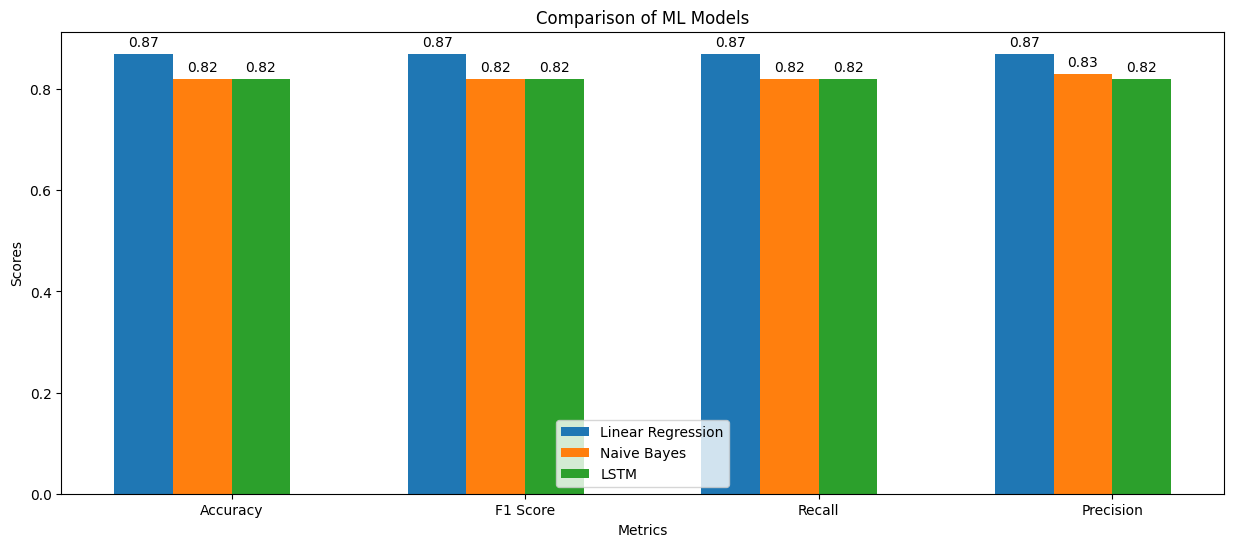

In [ ]:
# Dữ liệu
models = ['Linear Regression', 'Naive Bayes', 'LSTM']
metrics = ['Accuracy', 'F1 Score', 'Recall', 'Precision']
accuracy_scores = [Raccuracy_LR, Raccuracy_NB, Raccuracy]
f1_scores = [Rf1_LR, Rf1_NB, Rf1]
recall_scores = [Rrecall_LR, Rrecall_NB, Rrecall]
precision_scores = [Rprecision_LR, Rprecision_NB, Rprecision]

x = np.arange(len(metrics))  # Vị trí của các nhóm cột
width = 0.2  # Độ rộng của mỗi cột

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(15, 6))
rects1 = ax.bar(x - width*1.5, [accuracy_scores[0], f1_scores[0], recall_scores[0], precision_scores[0]], width, label='Linear Regression')
rects2 = ax.bar(x - width*0.5, [accuracy_scores[1], f1_scores[1], recall_scores[1], precision_scores[1]], width, label='Naive Bayes')
rects3 = ax.bar(x + width*0.5, [accuracy_scores[2], f1_scores[2], recall_scores[2], precision_scores[2]], width, label='LSTM')

# Thêm tiêu đề và nhãn cho các trục
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of ML Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Tạo chú thích cho từng nhóm cột
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # Offset cho vị trí chú thích
                    textcoords='offset points',
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
plt.show()

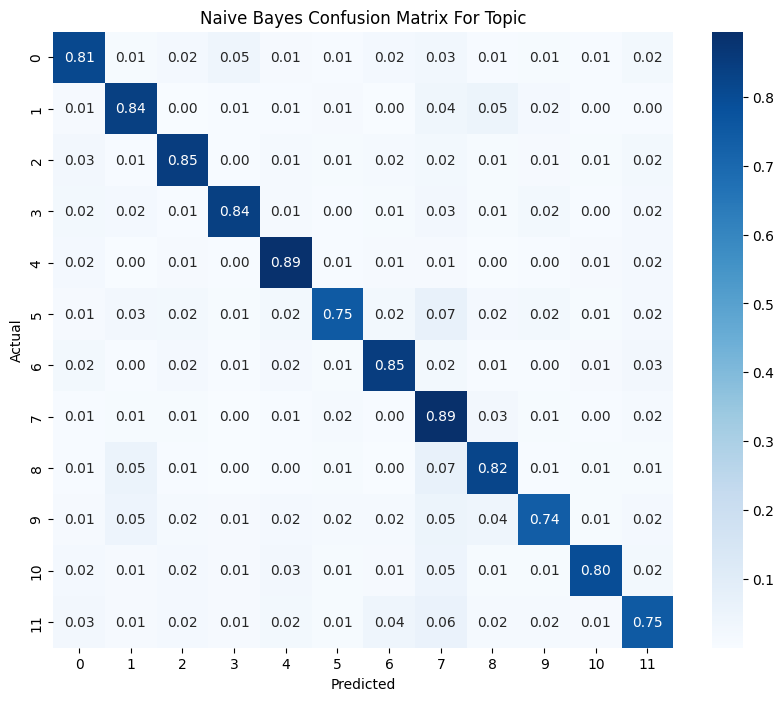

In [ ]:
# Tạo và in ra confusion matrix
conf_mat_NB = confusion_matrix(y_test_NB, y_pred_NB)

# Tính tổng số lượng mẫu thực tế cho mỗi lớp
row_sums_NB = conf_mat_NB.sum(axis=1)

# Chuẩn hóa ma trận nhầm lẫn bằng cách chia cho tổng số lượng mẫu thực tế
norm_conf_mat_NB = conf_mat_NB / row_sums_NB[:, np.newaxis]

# Tạo nhãn cho mỗi ô
labels_NB = [f'{val:.2f}' for val in norm_conf_mat_NB.flatten()]
labels_NB = np.asarray(labels_NB).reshape(norm_conf_mat_NB.shape)

# Vẽ ma trận nhầm lẫn đã chuẩn hóa
plt.figure(figsize=(10,8))
sns.heatmap(norm_conf_mat_NB, annot=labels_NB, fmt='', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix For Topic')
plt.show()

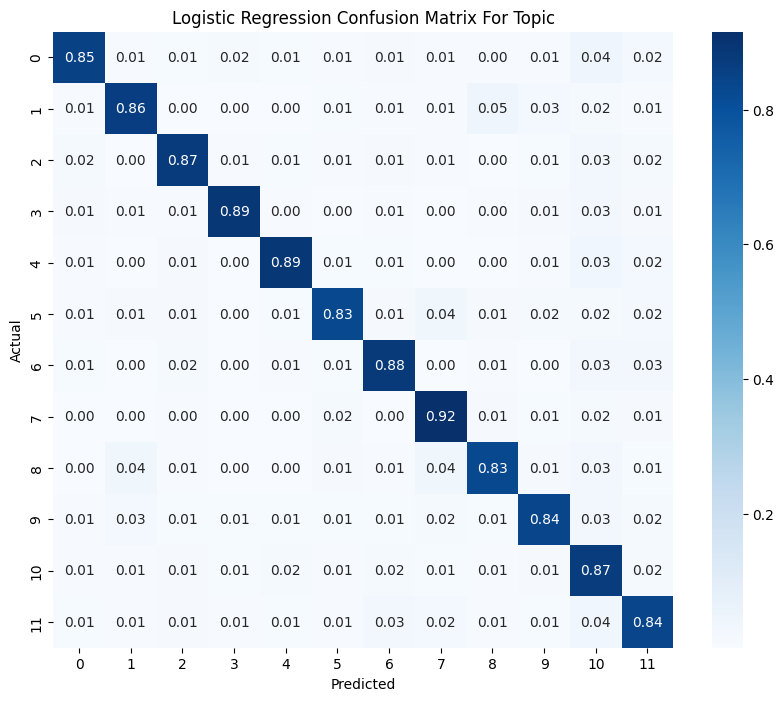

In [ ]:
# Tạo và in ra confusion matrix
conf_mat_LR = confusion_matrix(y_test_LR, predicted_labels_LR)

# Tính tổng số lượng mẫu thực tế cho mỗi lớp
row_sums_LR = conf_mat_LR.sum(axis=1)

# Chuẩn hóa ma trận nhầm lẫn bằng cách chia cho tổng số lượng mẫu thực tế
norm_conf_mat_LR = conf_mat_LR / row_sums_LR[:, np.newaxis]

# Tạo nhãn cho mỗi ô
labels_LR = [f'{val:.2f}' for val in norm_conf_mat_LR.flatten()]
labels_LR = np.asarray(labels_LR).reshape(norm_conf_mat_LR.shape)

# Vẽ ma trận nhầm lẫn đã chuẩn hóa
plt.figure(figsize=(10,8))
sns.heatmap(norm_conf_mat_LR, annot=labels_LR, fmt='', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix For Topic')
plt.show()

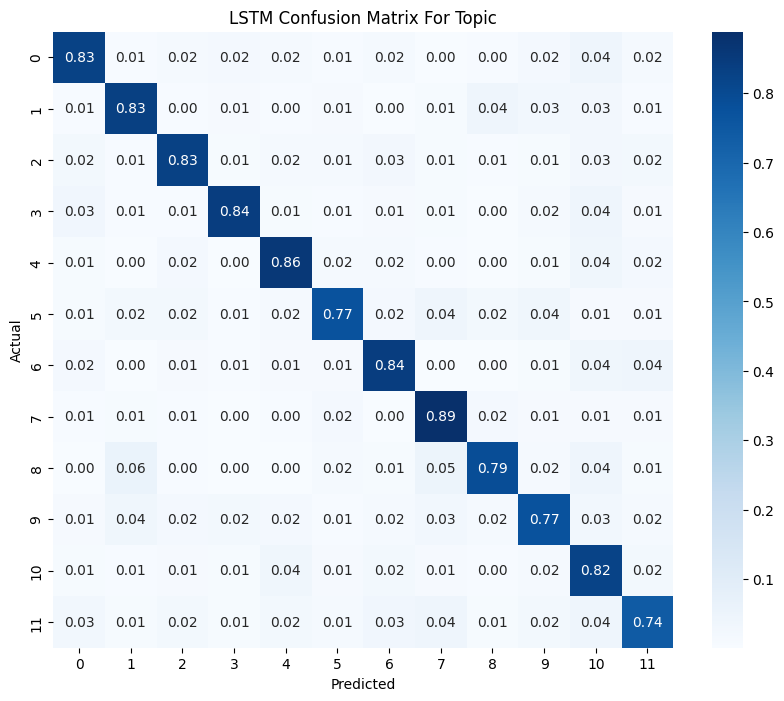

In [ ]:
# Tạo và in ra confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

# Tính tổng số lượng mẫu thực tế cho mỗi lớp
row_sums = conf_mat.sum(axis=1)

# Chuẩn hóa ma trận nhầm lẫn bằng cách chia cho tổng số lượng mẫu thực tế
norm_conf_mat = conf_mat / row_sums[:, np.newaxis]

# Tạo nhãn cho mỗi ô
labels_LSTM = [f'{val:.2f}' for val in norm_conf_mat.flatten()]
labels_LSTM = np.asarray(labels_LSTM).reshape(norm_conf_mat.shape)

# Vẽ ma trận nhầm lẫn đã chuẩn hóa
plt.figure(figsize=(10,8))
sns.heatmap(norm_conf_mat, annot=labels_LSTM, fmt='', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LSTM Confusion Matrix For Topic')
plt.show()

In [ ]:
print("Thời gian chạy của mô hình Logistic Regression:", elapsed_time_lr)
print("Thời gian chạy của mô hình Naive Bayes:", elapsed_time_nb)
print("Thời gian chạy của mô hình LSTM:", elapsed_time_lstm)

Thời gian chạy của mô hình Logistic Regression: 33.01220893859863
Thời gian chạy của mô hình Naive Bayes: 0.14923787117004395
Thời gian chạy của mô hình LSTM: 439.8254916667938


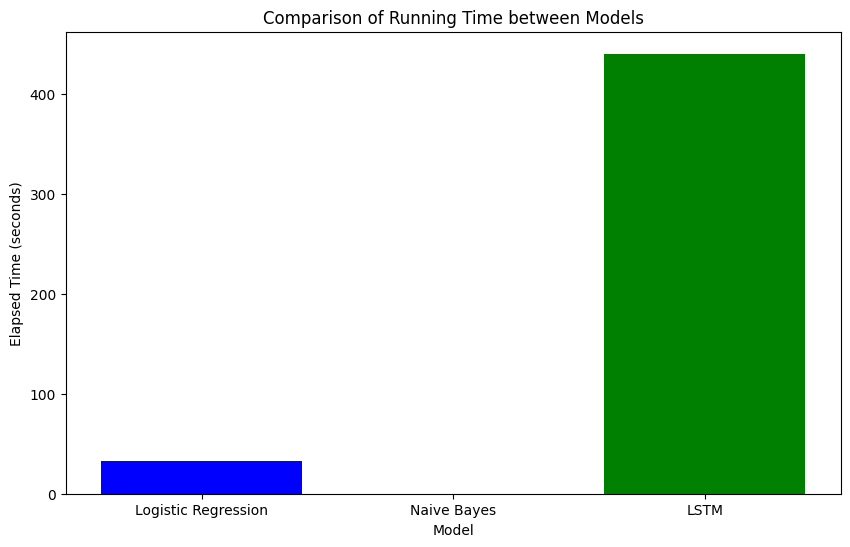

In [ ]:
import matplotlib.pyplot as plt

# Thời gian chạy của từng mô hình (đã tính được trước)
elapsed_times = [elapsed_time_lr, elapsed_time_nb, elapsed_time_lstm]

# Tên của các mô hình
model_names = ['Logistic Regression', 'Naive Bayes', 'LSTM']

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(model_names, elapsed_times, color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Elapsed Time (seconds)')
plt.title('Comparison of Running Time between Models')
plt.show()


In [ ]:
while True:
    # Nhập tựa đề video từ người dùng
    user_input = input('Nhập tựa đề video (nhập "q" để thoát): ')

    # Kiểm tra nếu người dùng muốn thoát
    if user_input.lower() == 'q':
        print('Kết thúc chương trình.')
        break

    # Chuyển đổi câu tiêu đề video thành vector nhúng
    title_vector = get_vector(user_input, w2v_model)
    title_vector = title_vector.reshape(-1, 1, embedding_dim)
    new_text_vectorized = vectorizer.transform([user_input])
    # Dự đoán nhãn cho tựa đề video với mô hình Logistic Regression
    predicted_label_lr = pipeline.predict([user_input])[0]

    # Dự đoán nhãn cho tựa đề video với mô hình Naive Bayes
    predicted_label_nb = classifier.predict(new_text_vectorized)

    # Dự đoán nhãn cho tựa đề video với mô hình LSTM
    predicted_label_lstm = model_LSTM_topic.predict(title_vector)
    predicted_label_lstm = np.argmax(predicted_label_lstm)

    decoded_label_lstm = label_encoder.inverse_transform([predicted_label_lstm])[0]
    decoded_label_nb = label_encoder.inverse_transform([predicted_label_nb])[0]

    # In kết quả dự đoán
    print('Nhãn dự đoán cho video với Logistic Regression:', predicted_label_lr)
    print('Nhãn dự đoán cho video với Naive Bayes:', decoded_label_nb)
    print('Nhãn dự đoán cho video với LSTM:', decoded_label_lstm)
    print('')

# RCM system

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

## Chuẩn bị dữ liệu gợi ý mẫu

In [ ]:
label_counts = data["Topic"].value_counts(normalize=True)
sample_size_per_label = 1000 // len(label_counts)

In [ ]:
# Initialize an empty DataFrame
recommend_data = pd.DataFrame()

# Assume label_counts contains the proportion of each label
# sample_size_per_label is the desired sample size per label

# Loop through each label to sample data
for label, proportion in label_counts.items():
    # Sample rows for each label based on thae sample size per label
    sampled_rows = data[data['Topic'] == label].sample(n=sample_size_per_label, replace=False)
    # Concatenate sampled rows to the recommend_data DataFrame
    recommend_data = pd.concat([recommend_data, sampled_rows])

# If the total sampled rows are less than 1000, sample random rows from the entire dataset to ensure 1000 rows

# Sample random rows if necessary
if len(recommend_data) < 1000:
    remaining_rows = 1000 - len(recommend_data)
    remaining_sample = data.sample(n=remaining_rows, replace=False)
    recommend_data = pd.concat([recommend_data, remaining_sample])

# Reset the index of the new DataFrame
recommend_data.reset_index(drop=True, inplace=True)


In [ ]:
recommend_data.to_csv('Recommend videos sample.csv', index=False)

In [ ]:
video = recommend_data['clean_title']
topic = recommend_data['Topic']
tokens = recommend_data['tokens']
re_title = recommend_data['Title']
dataset_videos = video.tolist()

## Xây dựng hệ thống

In [ ]:
# Tạo và cấu hình vectorizer
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')

# Huấn luyện vectorizer
vectorizer.fit(dataset_videos)

In [ ]:
def classify_video_title(title, pipeline):
    # Sử dụng mô hình đã huấn luyện để phân loại tựa đề video
    predicted_label = pipeline.predict([title])[0]
    return predicted_label

def compute_similarity(title, videos, labels, predicted_label, vectorizer, recommended_title):
    # Lọc chỉ các video cùng thể loại với tựa đề video nhập
    same_label_indices = [i for i, label in enumerate(labels) if label == predicted_label]
    same_label_videos = videos.iloc[same_label_indices]
    same_label_parameters = recommended_title.iloc[same_label_indices]

    # Biến đổi tựa đề video nhập thành vector đặc trưng
    title_vector = vectorizer.transform([title])

    # Biến đổi tựa đề của các video cùng thể loại thành vector đặc trưng
    same_label_vectors = vectorizer.transform(same_label_videos)

    # Tính độ tương đồng giữa tựa đề video nhập và các video cùng thể loại
    similarities = cosine_similarity(title_vector, same_label_vectors)

    # Sắp xếp các video theo độ tương đồng và lấy 5 video có độ tương đồng cao nhất
    top_indices = np.argsort(similarities.flatten())[-5:]
    top_videos = same_label_videos.iloc[top_indices]
    top_parameters = same_label_parameters.iloc[top_indices]

    return  top_parameters


In [ ]:
# Người dùng nhập tựa đề video
user_input = input('Nhập tựa đề video: ')

# Phân loại tựa đề video
predicted_label = classify_video_title(user_input, pipeline)

# Tính độ tương đồng và gợi ý video
recommended_videos = compute_similarity(user_input, video, topic , predicted_label, vectorizer, re_title )

# Hiển thị kết quả gợi ý
print('Video thuộc topic:', predicted_label)
print('Gợi ý 5 video có độ tương đồng cao nhất:')
for i, video in enumerate(recommended_videos, 1):
    print(f'  {i}. {video}')